Ссылка на материалы:  [пдф тут](https://drive.google.com/file/d/16Cm2tgrpuDH8eIdxdSYyOsfDPqnJ3byd/view?usp=sharing)

ФИО:

In [ ]:
Чикин Алексей Юрьевич

SyntaxError: invalid syntax (<ipython-input-39-66c078aea4d0>, line 1)

## Задание 1. HTTP-запросы, ответы и погода

Описание:

Напишите HTTP-запрос для получения информации о погоде в введенном городе из API.

Можно использовать API: https://open-meteo.com/. Используйте метод GET.


Ввод
```
56.50, 60.35
```

Вывод
```
Сегодня (1.11) погода 20 ◦С, нет осадков, туман
```





Код	Описание
- 0	Ясное небо.
- 1, 2, 3	Преимущественно ясно, переменная облачность, пасмурно
- 45, 48	Туман и оседающий изморозь
- 51, 53, 55	Морось: слабая, умеренная и интенсивная
- 56, 57	Замерзающая морось: слабая и плотная интенсивность
- 61, 63, 65	Дождь: слабый, умеренный и сильный
- 66, 67	Замерзающий дождь: слабой и сильной интенсивности
- 71, 73, 75	Снегопад: слабый, умеренный и сильный.
- 77	Снежные зерна
- 80, 81, 82	Ливневые дожди: слабые, умеренные и сильные
- 85, 86	Снежные ливни слабые и сильные
- 95 *	Гроза: слабая или умеренная
- 96, 99 *	Гроза с небольшим и сильным градом

In [ ]:
import requests
from datetime import datetime


# функция для отправки запроса
def send_request(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print('Response code:', response.status_code)
        return False


# отчистка данных
def clear_data(data):
    # определение даты
    current_date = datetime.today().date()
    day = current_date.day
    month = current_date.month
    current_date = f'{day}.{month}'

    # определение температуры
    temperature = data['current']['temperature_2m']
    temperature_format = data['current_units']['temperature_2m']

    # определение погодных условии
    weather_code = data['current']['weather_code']
    bad_weather = [51, 53, 55, 61, 63, 65, 71, 73, 75, 80, 81, 82 ]
    if weather_code in [0, 1]:
        message = 'нет осадков, ясно'
    elif weather_code == 45:
        message = 'нет осадков, туман'
    elif weather_code in bad_weather:
        message = 'осадки, без тумана'
    else:
        message = 'посмотри в окно'

    message = f'Сегодня ({current_date}) погода {temperature} {temperature_format}, {message}'

    return message


# основная функция
def main():
    coordinates = input('Введите ваши координаты:\n').split(', ')
    url = f'https://api.open-meteo.com/v1/forecast?latitude={coordinates[0]}&longitude={coordinates[1]}&current=temperature_2m,weather_code'
    data = send_request(url)
    print(clear_data(data))


if __name__ == '__main__':
    main()

Введите ваши координаты:
0.00, 0.00
Сегодня (1.11) погода 25.9 °C, посмотри в окно


## Задание 2. HTTP-запросы, ответы и покемоны

**Описание:**


Создайте код программы, которая будет взаимодействовать с API, со следующим функионалом:

1. Используя метод GET, отправьте запрос на endpoint /pokemon, чтобы получить список первых 20 покемонов

2. Извлеките имена покемонов из ответа и выведите их списком

3. Введите с помощью input() название одного из покемонов


```
Имя покемона: clefairy
```



4. Отправьте GET-запрос, чтобы получить полную информацию о выбранном покемоне

5. Извлеките и выведите следующие данные о введенном покемоне:

     • Имя

     • Тип

     • Вес

     • Рост

     • Способности

Используйте PokéAPI (https://pokeapi.co/), который предоставляет информацию о покемонах, их характеристиках, типах и другую информацию.

In [ ]:
import requests


# функция для отправки запроса
def send_request(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print('Response code:', response.status_code)
        return False


def research(data):
  name = data['name']
  poke_type = data['types'][0]['type']['name']
  weight = data['weight']
  height = data['height']
  ability = data['abilities'][0]['ability']['name']
  message = f'Имя: {name}\nТип: {poke_type}\nВес: {weight}\nРост: {height}\nСпособности: {ability}'

  return message


def main():
  name = input('Введите имя: ')
  url = f'https://pokeapi.co/api/v2/pokemon/{name}/'
  data = send_request(url)
  print(research(data))


main()

Введите имя: bulbasaur
Имя: bulbasaur
Тип: grass
Вес: 69
Рост: 7
Способности: overgrow


## Задание 3. HTTP-запросы, ответы и посты

**Описание:**

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API, реализуя следующие функции:

1. Реализуйте функцию, которая выполняет GET-запрос к https://jsonplaceholder.typicode.com/posts и возвращает список постов в формате JSON

2. Реализуйте функцию, котороая получает вводимое ID поста, выполняет GET-запрос по ID и возвращает данные поста в формате JSON

3. Реализуйте функцию, которая выполняет обработку JSON из пункта 2 и выводит всю важную информацию в консоль

In [ ]:
import requests


def send_request(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print('Response code:', response.status_code)
        return False


def research(data,id1):
  message1 = data[id1]
  message2 = f'Title: {data[id1]["title"]}\nText: {data[id1]["body"]}'

  print(message1)
  print(message2)


def main():
  id1 = int(input('ID: '))
  url = f' https://jsonplaceholder.typicode.com/posts'
  data = send_request(url)

  research(data,id1)


main()

ID: 1
{'userId': 1, 'id': 2, 'title': 'qui est esse', 'body': 'est rerum tempore vitae\nsequi sint nihil reprehenderit dolor beatae ea dolores neque\nfugiat blanditiis voluptate porro vel nihil molestiae ut reiciendis\nqui aperiam non debitis possimus qui neque nisi nulla'}
Title: qui est esse
Text: est rerum tempore vitae
sequi sint nihil reprehenderit dolor beatae ea dolores neque
fugiat blanditiis voluptate porro vel nihil molestiae ut reiciendis
qui aperiam non debitis possimus qui neque nisi nulla


## Задание 4. HTTP-запросы, ответы и работа с постами

**Описание**

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API (из предыдущего задания), реализуя новые функции:

1. Реализуйте функцию, которая принимает заголовок, содержимое и ID пользователя (информация вводится с помощью input()), выполняет POST-запрос для создания нового поста и возвращает информацию о созданном посте в формате JSON


```
Заголовок: Новый пост
Содержимое поста: Тут должно находиться содержимое нового поста...
ID пользователя: 10
```



2. Реализуйте функцию, которая принимает ID поста, новый заголовок и новое содержимое, выполняет PUT-запрос и возвращает обновлённый пост в формате JSON

3. Реализуйте функцию, которая принимает ID поста, выполняет DELETE-запрос и возвращает статус-код ответа

In [ ]:
import requests

#Ссылка не работает, из-за этого вроде ошибка соединения


def send_request(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print('Response code:', response.status_code)
        return False


def posting(url):
  user_title = input('Заголовок: ')
  user_body = input('Содержимое: ')
  user_id = int(input('ID: '))
  dict1 = {'Заголовок:':user_title,
           'Содержимое поста:':user_body,
           'ID пользователя':user_id}
  response = requests.post(url,data=dict1)

  print(response.json())


def putting():
  user_title = input('Заголовок: ')
  user_body = input('Содержимое: ')
  user_id = int(input('ID: '))
  dict2 = {'Заголовок:':user_title,
           'Содержимое поста:':user_body,
           'ID пользователя':user_id}
  response = requests.put(f'https://jsonplaceholder.typicode.com/posts/{user_id}',data=dict2)

  print(response.json())




def deleting():
  user_id = int(input('ID: '))
  data1 = requests.delete(f'https://jsonplaceholder.typicode.com/posts/{user_id}')
  print(data1.status_code)


def main():
  url = f'https://jsonplaceholder.typicode.com/posts'
  data = send_request(url)
  posting(url)
  putting()
  deleting()


if __name__ == '__main__':
  main()


Заголовок: a
Содержимое: a
ID: a


ValueError: invalid literal for int() with base 10: 'a'

## Задание 5. HTTP-запросы, ответы и пёсики

**Описание**

Создайте программу, которая будет взаимодействовать с Dog API, которая позволит получать список пород собак, вводить несколько пород и получать их фотогрфии.

Этапы:

1. Создайте функцию, которая использует метод GET и возвращает список всех пород собак в формате нумерованного списка

2. Реализуйте возможность ввода нескольких пород собак через запятую


```
african, chow, dingo
```



3. Создание функции, которая реализует запрос, возвращает и выводит изображениия собак, породы которых были введены до этого


Используйте Dog API (https://dog.ceo/dog-api/), который предоставляет информацию о породах собак и их изображения.


*Подсказка*



```
import requests
from PIL import Image
from IPython.display import display
import io

url = <____>
response = <____>
        
if response.<______> == <___>:
      image_url = response.json()['message']

res = requests.<__>(image_url)
img = Image.open(io.BytesIO(res.content))
display(img)
```



1. affenpinscher
2. african
3. airedale
4. akita
5. appenzeller
6. australian kelpie
7. australian shepherd
8. bakharwal indian
9. basenji
10. beagle
11. bluetick
12. borzoi
13. bouvier
14. boxer
15. brabancon
16. briard
17. buhund norwegian
18. bulldog boston
19. bulldog english
20. bulldog french
21. bullterrier staffordshire
22. cattledog australian
23. cavapoo
24. chihuahua
25. chippiparai indian
26. chow
27. clumber
28. cockapoo
29. collie border
30. coonhound
31. corgi cardigan
32. cotondetulear
33. dachshund
34. dalmatian
35. dane great
36. danish swedish
37. deerhound scottish
38. dhole
39. dingo
40. doberman
41. elkhound norwegian
42. entlebucher
43. eskimo
44. finnish lapphund
45. frise bichon
46. gaddi indian
47. germanshepherd
48. greyhound indian
49. greyhound italian
50. groenendael
51. havanese
52. hound afghan
53. hound basset
54. hound blood
55. hound english
56. hound ibizan
57. hound plott
58. hound walker
59. husky
60. keeshond
61. kelpie
62. kombai
63. komondor
64.

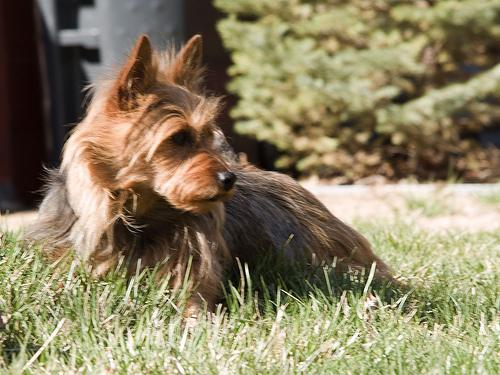

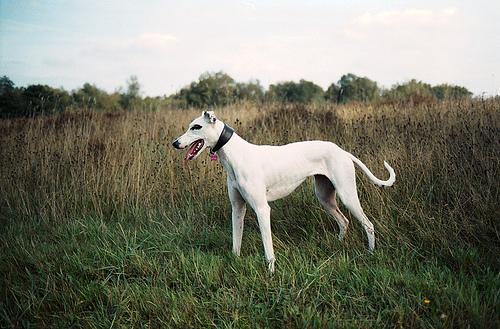

In [ ]:
import requests
from PIL import Image
from IPython.display import display
import io


def getting(url):
  response = requests.get(url)
  responsee = response.json()

  b = responsee['message'].items()
  n=1
  for k,j in b:
      if len(j)>0:
          for h in j:
              print(f'{n}. {k} {h}')
              n+=1
      else:
          print(f'{n}. {k}')
          n+=1
  print()


def inputting():
  user_input = input('Введите породу или породы через запятую: ').split(', ')
  print()
  for i in user_input:
    url = f'https://dog.ceo/api/breed/{i}/images/random'
    response = requests.get(url)
    image_url = ''
    if response.status_code == 200:
      image_url = response.json()['message']

    res = requests.get(image_url)
    img = Image.open(io.BytesIO(res.content))
    display(img)


if __name__ == '__main__':
  url = 'https://dog.ceo/api/breeds/list/all'
  getting(url)
  inputting()